In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/nilvi/OneDrive/Escritorio/Ironhack/kaggle/amz_uk_price_prediction_dataset.csv')

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'], normalize = 'index')* 100
sorted_crosstab = crosstab_result.sort_values(by=True, ascending=False)
sorted_crosstab.head(10)

## There are no categories where bestSeller is prevalent..

isBestSeller,False,True
category,,
Grocery,94.186533,5.813467
Smart Home Security & Lighting,94.230769,5.769231
Health & Personal Care,94.231372,5.768628
Mobile Phone Accessories,95.752896,4.247104
Power & Hand Tools,96.466105,3.533895
"Billiard, Snooker & Pool",96.787149,3.212851
Pet Supplies,96.979972,3.020028
Home Brewing & Wine Making,97.154472,2.845528
Wind Instruments,97.200000,2.800000


In [5]:
from scipy.stats import chi2_contingency
import pandas as pd


contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

In [6]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p_value}, degrees of freedom: {dof}")

## the p-value is 0.0, 
## The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low \( p \)-value, we reject the null hypothesis. This implies that there's a significant association between `category` and `isBestSeller` in the dataset.


Chi-squared: 36540.20270061387, p-value: 0.0, degrees of freedom: 295


In [7]:
from scipy.stats.contingency import association

association(contingency_table, method="cramer")

## cramer's value 0.12 indicates a weak association between the two categorical variables, `category` and `isBestSeller`. This suggests that while there is some relationship between the two variables, it is not strong enough to imply a significant dependency.

0.1222829439760564

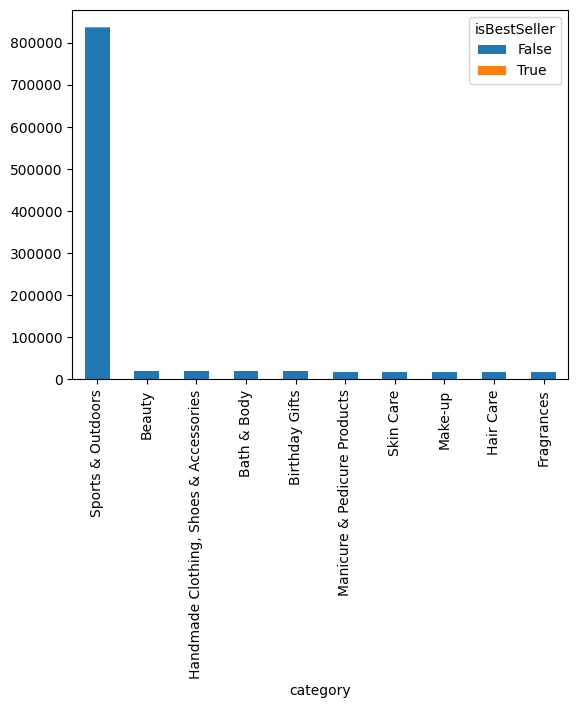

In [8]:
import matplotlib.pyplot as plt

top_cats = df['category'].value_counts().head(10).index
pd.crosstab(df['category'], df['isBestSeller']).loc[top_cats].plot.bar(stacked=True)
plt.show()


In [9]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [10]:
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original data size: {len(df)}")
print(f"Data size after removing outliers: {len(df_no_outliers)}")
print(f"Number of removed outliers: {len(df) - len(df_no_outliers)}")

Original data size: 2443651
Data size after removing outliers: 2115963
Number of removed outliers: 327688


In [11]:
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]


C:\Users\nilvi\AppData\Local\Temp\ipykernel_44360\1909425868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")


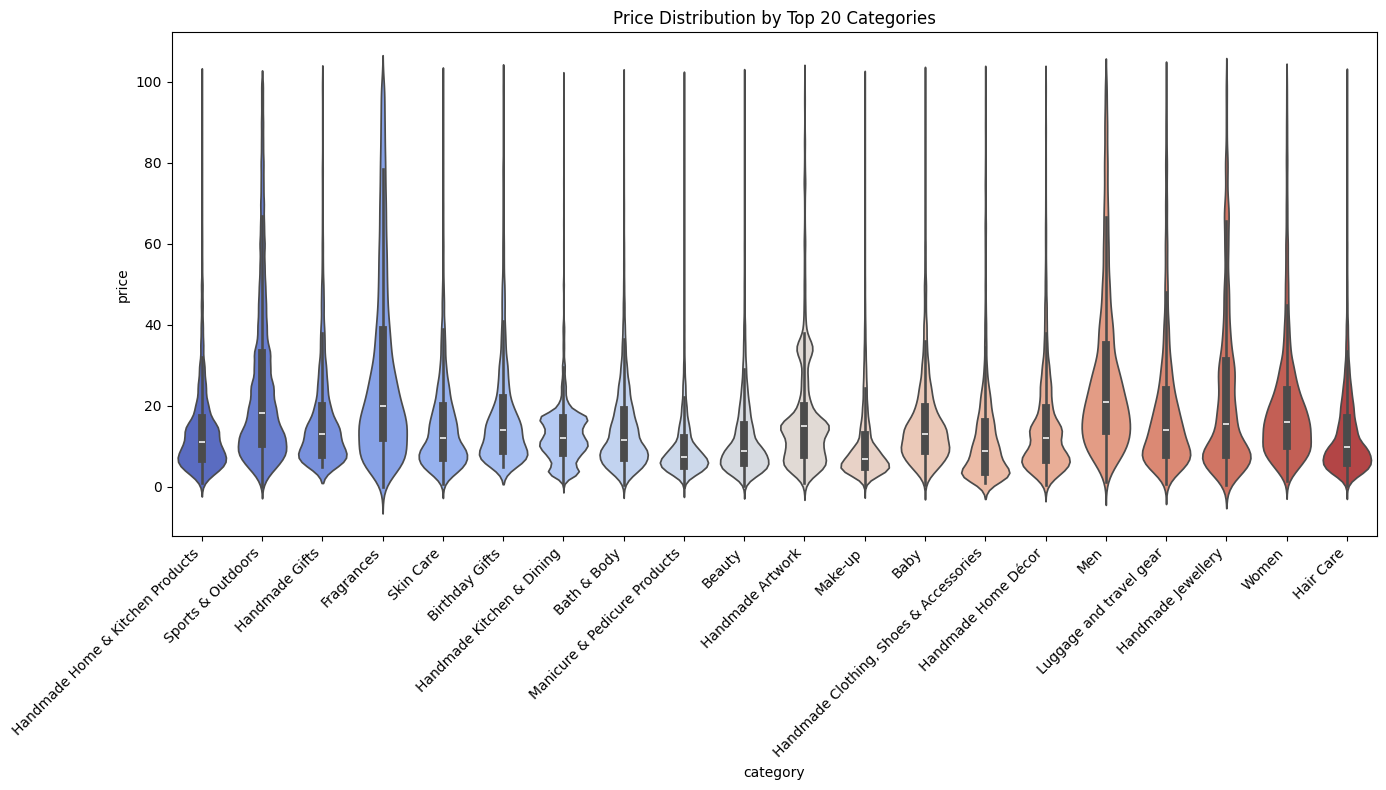

In [12]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.violinplot(data=df_top_20, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution by Top 20 Categories')
plt.tight_layout()
plt.show()

## Men is the category with the highest median price

In [13]:
category_median_prices = df_no_outliers.groupby('category')['price'].median()

highest_median_category = category_median_prices.sort_values(ascending=False)

highest_median_category.head(1)

## The category with the highest median price is Desktop PCs with a median price of 74

category
Desktop PCs    74.0
Name: price, dtype: float64

In [14]:
highest_median_category

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

In [15]:
import matplotlib.pyplot as plt

top_10_categories = df_no_outliers['category'].value_counts().head(10).index

df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

avg_prices = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

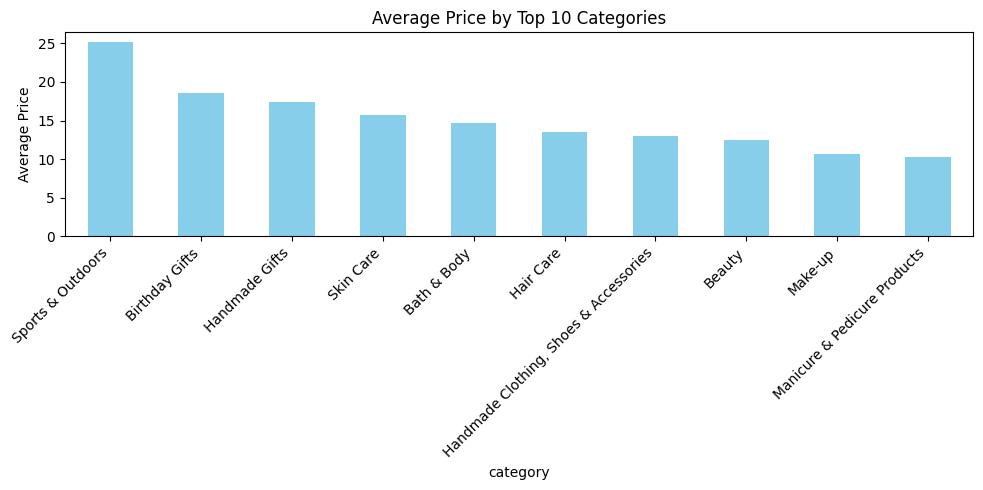

In [16]:
avg_prices.plot(kind='bar', figsize=(10, 5), color='skyblue', title='Average Price by Top 10 Categories')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
highest_avg_price = df_no_outliers.groupby('category')['price'].mean().sort_values(ascending=False).head(1)
print(highest_avg_price)

#category with the highest average price without sorting by top categories is Motherboards with an avg price of 68.77

category
Motherboards    68.772432
Name: price, dtype: float64


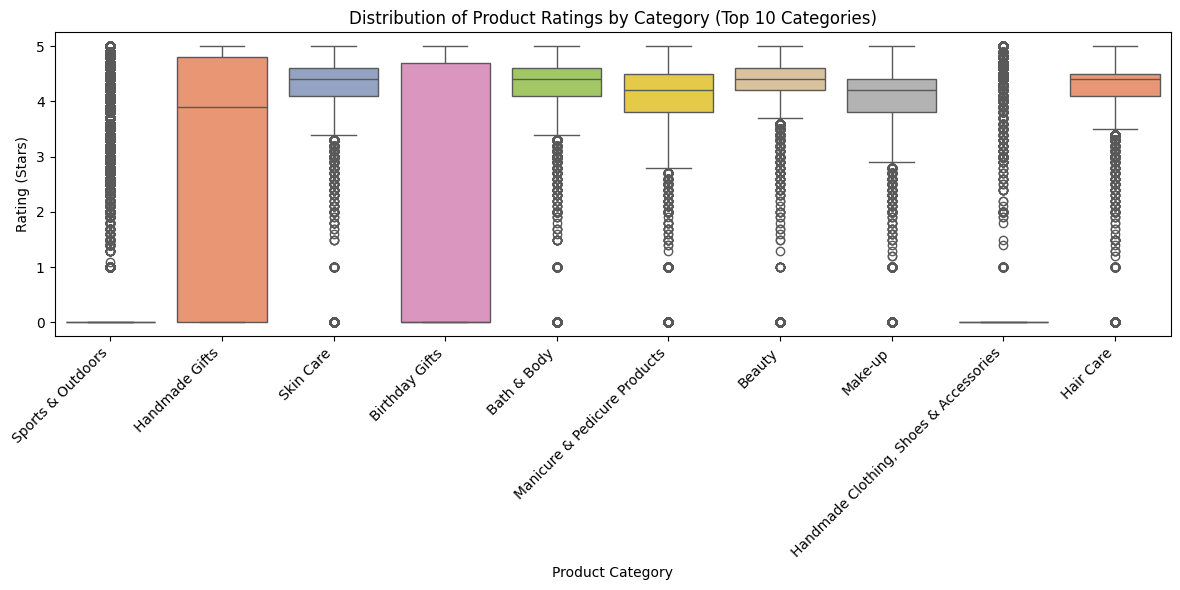

In [18]:
#### PART 2 BOX PLOTS..

top_10_categories = df_no_outliers['category'].value_counts().head(10).index

df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='category', y='stars', palette='Set2', hue = 'category')

plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.ylabel('Rating (Stars)')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:
median_ratings = df_no_outliers.groupby('category')['stars'].median()
highest_median_rating = median_ratings.sort_values(ascending=False).head(1)
highest_median_rating

## Highest median rating is for Computer Memory with 4.7 stars (without filtering by top 10 categories)


category
Computer Memory    4.7
Name: stars, dtype: float64

In [20]:
### PART 3

df_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [22]:
correlation = df_no_outliers['stars'].corr(df_no_outliers['price'])
print("Pearson correlation between stars and price:", correlation)

Pearson correlation between stars and price: -0.07767299878181323


In [23]:
# The result indicates that there is no meaningful linear correlation between product ratings and prices.

<Axes: xlabel='stars', ylabel='price'>

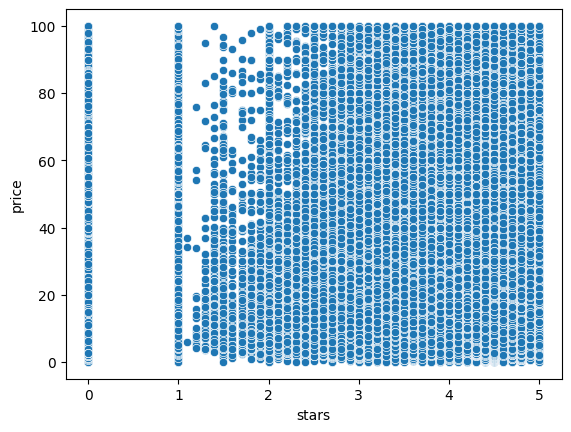

In [24]:
sns.scatterplot(data=df_no_outliers, x='stars', y='price')

In [25]:
# Chart indicates that both measures are uncorrelated..

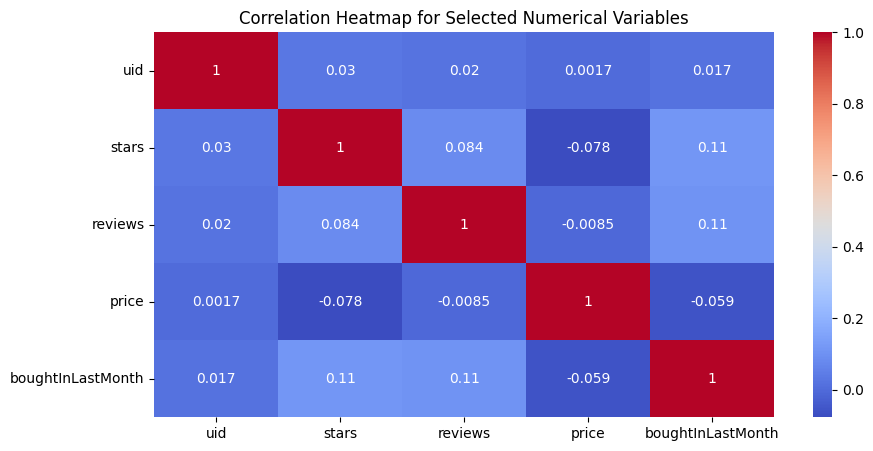

In [30]:
df_no_outliers.dtypes

numeric_df = df_no_outliers.select_dtypes(include = 'number')
numeric_df

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 5))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [31]:
# There's no significant correlation between any of the numerical variables of the df, actually results show independance among all of them.

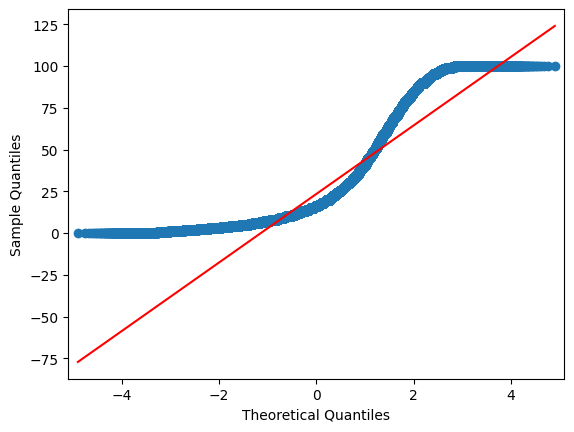

In [33]:
import statsmodels.api	as sm

sm.qqplot(df_no_outliers['price'], line='s');

In [34]:
# Product prices do not follow a normal distribution, it shows skewness and deviation from normality.